> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Soccer Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project I will be analyzing data extracted from the soccer database, using DB Browser for SQLite, which comprises eight different tables.

>I am going to focus on the factors associated with higher winning rate such as home_field advantage and other team-related attributes.

> The questions that this analysis will focus on:

> 1- Does home field advantage matter?

> 2- What attributes are associated with a higher winning rate?

> 3- What are the most successful teams in Europe over the time period in question?

> 4- Who the the top players in Europe over the time period?

> 5- Who are the most prolific penalty takers in Europe?

> 6- What are the attributes associated with different levels of footballers?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df_matches = pd.read_csv('matches.csv')
df_matches.head()

,country_name,league_name,season,date,home_team,home_goals,away_goals,away_team,winner
0,Belgium,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KRC Genk,1,1,Beerschot AC,Draw
1,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,SV Zulte-Waregem,0,0,Sporting Lokeren,Draw
2,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,KSV Cercle Brugge,0,3,RSC Anderlecht,RSC Anderlecht
3,Belgium,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,KAA Gent,5,0,RAEC Mons,KAA Gent
4,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,FCV Dender EH,1,3,Standard de Liège,Standard de Liège


viewing the first few rows of the dataframe to analyze its general structure and find if it needs any modifications.

In [3]:
df_matches.shape

(25979, 9)

In [4]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
country_name    25979 non-null object
league_name     25979 non-null object
season          25979 non-null object
date            25979 non-null object
home_team       25979 non-null object
home_goals      25979 non-null int64
away_goals      25979 non-null int64
away_team       25979 non-null object
winner          25979 non-null object
dtypes: int64(2), object(7)
memory usage: 1.8+ MB


there are no Null values in the dataframe, but the datatype of the date column needs to be changed to datetime.

In [5]:
df_matches.describe()

,home_goals,away_goals
count,25979.000000,25979.000000
mean,1.544594,1.160938
std,1.297158,1.142110
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,9.000000


here we can see that the home teams score more goals than away teams on average. 

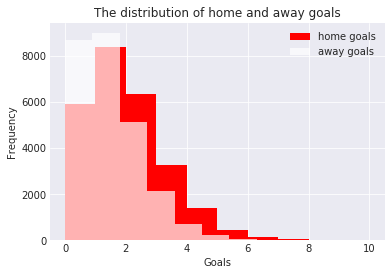

In [106]:
df_matches['home_goals'].hist(color = 'r')
df_matches['away_goals'].hist(alpha = 0.7, color = 'w')
plt.legend(['home goals', 'away goals'])
plt.title('The distribution of home and away goals')
plt.xlabel('Goals')
plt.ylabel('Frequency');

even though home teams seem to score more goals, the distribution of home and away goals seems pretty similar.

### Data Cleaning 

In [6]:
#changing the data type of the date column
type(df_matches.date[0])

str

In [7]:
df_matches.date = pd.to_datetime(df_matches.date)

In [8]:
df_matches.head()

,country_name,league_name,season,date,home_team,home_goals,away_goals,away_team,winner
0,Belgium,Belgium Jupiler League,2008/2009,2008-08-17,KRC Genk,1,1,Beerschot AC,Draw
1,Belgium,Belgium Jupiler League,2008/2009,2008-08-16,SV Zulte-Waregem,0,0,Sporting Lokeren,Draw
2,Belgium,Belgium Jupiler League,2008/2009,2008-08-16,KSV Cercle Brugge,0,3,RSC Anderlecht,RSC Anderlecht
3,Belgium,Belgium Jupiler League,2008/2009,2008-08-17,KAA Gent,5,0,RAEC Mons,KAA Gent
4,Belgium,Belgium Jupiler League,2008/2009,2008-08-16,FCV Dender EH,1,3,Standard de Liège,Standard de Liège


now the date column has been changed to datetime data type.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Does home-field advantage matter?)

In [9]:
#the number of matches won by home teams
home_win_count = df_matches.query('home_team == winner')['season'].count()
home_win_count

11919

In [10]:
#the number of matches won by away teams
away_win_count = df_matches.query('away_team == winner')['season'].count()
away_win_count

7468

In [11]:
#the number of matches that eneded in a draw
draw_count = df_matches.query('winner == "Draw"')['season'].count()
draw_count

6596

In [12]:
#the number of total matches
total_games = df_matches['season'].count()
total_games

25979

In [13]:
home_win_percentage = (home_win_count / total_games) * 100
away_win_percentage = (away_win_count / total_games) * 100
draw_percentage = (draw_count / total_games) * 100
print(home_win_percentage, away_win_percentage, draw_percentage)

45.8793641018 28.7462950845 25.3897378652


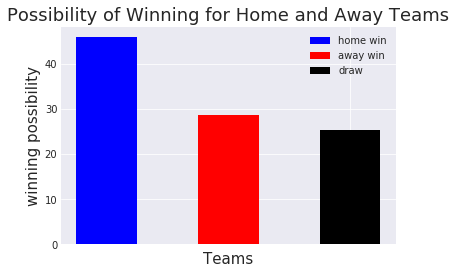

In [14]:
#plotting the results
plt.bar([1], home_win_percentage, width = 0.5, color = 'blue', label = 'home win', tick_label = '')
plt.bar([2], away_win_percentage, width = 0.5, color = 'red', label = 'away win', tick_label = '')
plt.bar([3], draw_percentage, width = 0.5, color = 'black', label = 'draw', tick_label = '')
plt.title('Possibility of Winning for Home and Away Teams', fontsize = 18)
plt.xlabel('Teams', fontsize = 15)
plt.ylabel('winning possibility', fontsize = 15)
plt.legend();

the above distribution shows that teams that play at their home field have approximately 45% chance of winning, with 28% winning chance for away teams.

### Research Question 2  (What attributes are associated with a higher winning rate?)

In [15]:
# to answer this question, I will import another data set that is extracted from the soccer database.
#this dataset records the wins and loses of some top European teams throughout the time period from 2008 to 2016.
df_team_attributes = pd.read_csv('team_results_attributes.csv')
df_team_attributes.head(1)

,team,wins,loses,team_api_id,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,FC Barcelona,234,27,8634,Balanced,Normal,Mixed,Free Form,Normal,Normal,Normal,Free Form,Medium,Press,Normal,Cover


looking at the first row of the dataframe, there are some non essential columns that could be removed. Also we can lowercase the column names to make it easier to work with.

In [16]:
df_team_attributes.shape

(245, 16)

In [17]:
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 16 columns):
team                              245 non-null object
wins                              245 non-null int64
loses                             245 non-null int64
team_api_id                       245 non-null int64
buildUpPlaySpeedClass             245 non-null object
buildUpPlayDribblingClass         245 non-null object
buildUpPlayPassingClass           245 non-null object
buildUpPlayPositioningClass       245 non-null object
chanceCreationPassingClass        245 non-null object
chanceCreationCrossingClass       245 non-null object
chanceCreationShootingClass       245 non-null object
chanceCreationPositioningClass    245 non-null object
defencePressureClass              245 non-null object
defenceAggressionClass            245 non-null object
defenceTeamWidthClass             245 non-null object
defenceDefenderLineClass          245 non-null object
dtypes: int64(3), object(13)
memor

there are no Null values in the dataset.

In [18]:
df_team_attributes.describe()

,wins,loses,team_api_id
count,245.000000,245.000000,245.000000
mean,73.967347,69.787755,11856.351020
std,52.099752,32.429050,24049.761576
min,3.000000,14.000000,1601.000000
25%,27.000000,44.000000,8429.000000
50%,67.000000,71.000000,8667.000000
75%,107.000000,95.000000,9904.000000
max,234.000000,142.000000,274581.000000


the summary statistics shows that even though the mean number of wins is about 74, there are teams that achieved as many as 234. the same also applies for the loses. 

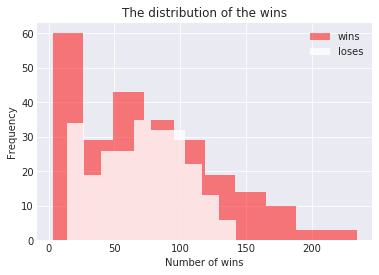

In [94]:
#plotting the distribution of the wins
df_team_attributes['wins'].hist(color = 'r', alpha = 0.5, label = 'wins')
df_team_attributes['loses'].hist(color = 'w', alpha = 0.8, label = 'loses')
plt.title('The distribution of the wins')
plt.xlabel('Number of wins')
plt.ylabel('Frequency')
plt.legend();

in the above visualization, we can see that the distribution of wins is right skewed, and that's why the mean is greater than the median.
on the other hand, the distribution of the loses is somewhat normal which explains why the mean is pretty close to the median.

### Data Cleaning 

In [19]:
#removing unnecessary columns
df_team_attributes.drop(columns = ('team_api_id'), inplace = True)

In [20]:
#lowercasing column names
df_team_attributes.rename(columns = lambda x : x.lower(), inplace = True)
df_team_attributes.head(1)

,team,wins,loses,buildupplayspeedclass,buildupplaydribblingclass,buildupplaypassingclass,buildupplaypositioningclass,chancecreationpassingclass,chancecreationcrossingclass,chancecreationshootingclass,chancecreationpositioningclass,defencepressureclass,defenceaggressionclass,defenceteamwidthclass,defencedefenderlineclass
0,FC Barcelona,234,27,Balanced,Normal,Mixed,Free Form,Normal,Normal,Normal,Free Form,Medium,Press,Normal,Cover


In [21]:
#adding new columns for "total_games" and "draws"
games = []
for item in df_team_attributes.team:
    games.append(df_matches.loc[(df_matches.home_team == item) | (df_matches.away_team == item)]['season'].count())
df_team_attributes['games'] = games

In [22]:
df_team_attributes['draws'] =  df_team_attributes.games - (df_team_attributes.wins + df_team_attributes.loses)

In [23]:
df_team_attributes.shape

(245, 17)

In [24]:
#rearranging columns
df_team_attributes = df_team_attributes.iloc[:, np.r_[0, 15, 1,2,16,3:15 ]]

In [25]:
df_team_attributes.head(1)

,team,games,wins,loses,draws,buildupplayspeedclass,buildupplaydribblingclass,buildupplaypassingclass,buildupplaypositioningclass,chancecreationpassingclass,chancecreationcrossingclass,chancecreationshootingclass,chancecreationpositioningclass,defencepressureclass,defenceaggressionclass,defenceteamwidthclass,defencedefenderlineclass
0,FC Barcelona,304,234,27,43,Balanced,Normal,Mixed,Free Form,Normal,Normal,Normal,Free Form,Medium,Press,Normal,Cover


### Exploratory Data Analysis (for the second data set "df_team_attributes")


In [26]:
df_team_attributes.groupby('buildupplayspeedclass')['wins'].describe()

,count,mean,std,min,25%,50%,75%,max
buildupplayspeedclass,,,,,,,,
Balanced,220.0,71.772727,50.849075,3.0,27.0,65.0,105.00,234.0
Fast,21.0,96.523810,62.913925,7.0,42.0,87.0,157.00,185.0
Slow,4.0,76.250000,41.347108,22.0,55.0,87.0,108.25,109.0


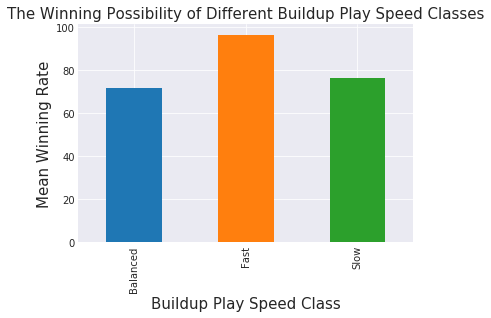

In [27]:
#investigating the common attributes that are associated with a higher winning rate
df_team_attributes.groupby('buildupplayspeedclass')['wins'].mean().plot(kind = 'bar')
plt.title('The Winning Possibility of Different Buildup Play Speed Classes', fontsize = 15)
plt.xlabel('Buildup Play Speed Class', fontsize = 15)
plt.ylabel('Mean Winning Rate', fontsize = 15);

the above visualization shows that teams that adop a FAST buildup play speed class have a higher winning rate.

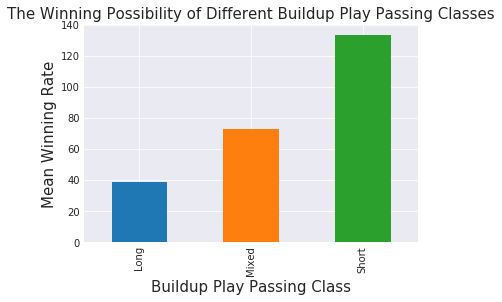

In [28]:
df_team_attributes.groupby('buildupplaypassingclass')['wins'].mean().plot(kind = 'bar')
plt.title('The Winning Possibility of Different Buildup Play Passing Classes', fontsize = 15)
plt.xlabel('Buildup Play Passing Class', fontsize = 15)
plt.ylabel('Mean Winning Rate', fontsize = 15);

this visualizations shows that teams that use SHORT passes achieve a higher winning rate.

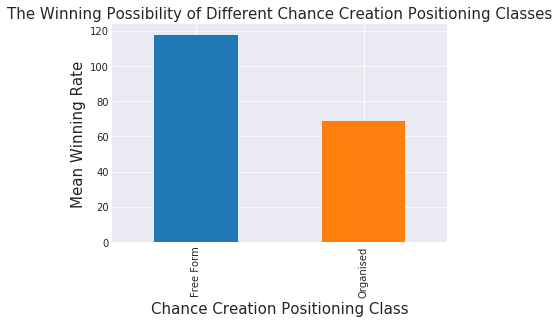

In [29]:
df_team_attributes.groupby('chancecreationpositioningclass')['wins'].mean().plot(kind = 'bar')
plt.title('The Winning Possibility of Different Chance Creation Positioning Classes', fontsize = 15)
plt.xlabel('Chance Creation Positioning Class', fontsize = 15)
plt.ylabel('Mean Winning Rate', fontsize = 15);

Free Form Chance Creation Positioning class is associated with a higher winning rate.

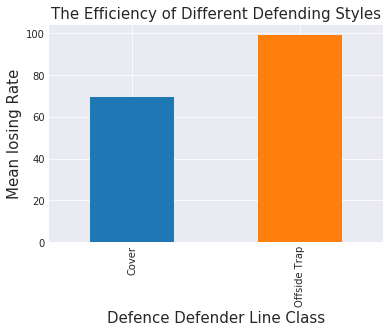

In [30]:
#which modes of defending associated with a higher losing rate
df_team_attributes.groupby('defencedefenderlineclass')['loses'].mean().plot(kind = 'bar')
plt.title('The Efficiency of Different Defending Styles', fontsize = 15)
plt.xlabel('Defence Defender Line Class', fontsize = 15)
plt.ylabel('Mean losing Rate', fontsize = 15);

this visualization shows that teams that use Offside Trap as their defending Strategy have suffered more loses than teams that used Cover strategy.

### Research Question 3  (What are the most successful teams in Europe over the time period in question?)

In [31]:
df_team_attributes['winning_ratio'] = df_team_attributes.wins/df_team_attributes.games

In [32]:
df_team_attributes.head(10)

,team,games,wins,loses,draws,buildupplayspeedclass,buildupplaydribblingclass,buildupplaypassingclass,buildupplaypositioningclass,chancecreationpassingclass,chancecreationcrossingclass,chancecreationshootingclass,chancecreationpositioningclass,defencepressureclass,defenceaggressionclass,defenceteamwidthclass,defencedefenderlineclass,winning_ratio
0,FC Barcelona,304,234,27,43,Balanced,Normal,Mixed,Free Form,Normal,Normal,Normal,Free Form,Medium,Press,Normal,Cover,0.769737
1,Real Madrid CF,304,228,40,36,Balanced,Normal,Mixed,Free Form,Normal,Normal,Normal,Free Form,Medium,Press,Normal,Cover,0.750000
2,Celtic,304,218,36,50,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover,0.717105
3,FC Bayern Munich,272,193,35,44,Balanced,Little,Short,Free Form,Normal,Little,Little,Free Form,High,Press,Normal,Cover,0.709559
4,Juventus,301,189,46,66,Balanced,Normal,Short,Organised,Normal,Normal,Lots,Organised,Medium,Press,Normal,Cover,0.627907
5,SL Benfica,248,185,27,36,Fast,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover,0.745968
6,FC Porto,248,183,23,42,Fast,Normal,Mixed,Organised,Normal,Normal,Lots,Organised,Medium,Press,Normal,Cover,0.737903
7,Ajax,272,181,32,59,Balanced,Normal,Mixed,Organised,Normal,Normal,Little,Free Form,Medium,Press,Normal,Cover,0.665441
8,FC Basel,286,180,42,64,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover,0.629371
9,Manchester United,304,192,55,57,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover,0.631579


In [33]:
df_team_attributes.describe()

,games,wins,loses,draws,winning_ratio
count,245.000000,245.000000,245.000000,245.000000,245.000000
mean,192.510204,73.967347,69.787755,48.755102,0.344558
std,92.388019,52.099752,32.429050,24.172307,0.130877
min,34.000000,3.000000,14.000000,4.000000,0.078947
25%,114.000000,27.000000,44.000000,30.000000,0.258555
50%,212.000000,67.000000,71.000000,52.000000,0.319079
75%,272.000000,107.000000,95.000000,69.000000,0.398026
max,304.000000,234.000000,142.000000,100.000000,0.769737


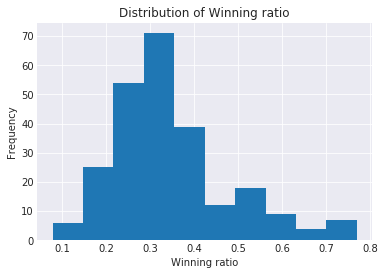

In [95]:
#the distribution of teams' winning ratios
df_team_attributes['winning_ratio'].hist()
plt.title('Distribution of Winning ratio')
plt.xlabel('Winning ratio')
plt.ylabel('Frequency');

the distribution shows that most teams have a winning ratio between 0.25 and 0.39.

In [35]:
df_team_attributes.sort_values('winning_ratio', ascending = False, inplace = True)

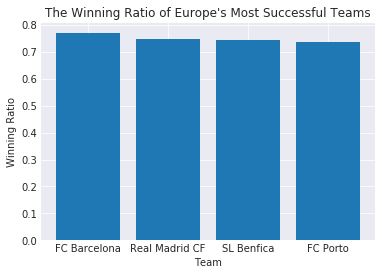

In [36]:
loc = np.arange(len(df_team_attributes.head(4)))
winning_ratio = df_team_attributes.winning_ratio.head(4)
plt.bar(loc, winning_ratio)
labels = df_team_attributes.team.head(4).values.tolist()
plt.xticks(loc, labels)
plt.title("The Winning Ratio of Europe's Most Successful Teams")
plt.xlabel('Team')
plt.ylabel('Winning Ratio');

FC Barcelona has achieved the highest winning rate in Europe over the time period in question.

### Research Question 4  (Who are the top players  in Europe over the time period in question?)

In [37]:
# to answer this question, I will import another data set that is extracted from the soccer database.
df_player_attributes = pd.read_csv('player_attributes.csv')
df_player_attributes.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id.1,player_fifa_api_id.1,player_api_id.1,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


there are some unnecessary columns that should be removed.
I also need to change the datatype of the date and the birthday columns

In [38]:
df_player_attributes.shape

(186345, 49)

In [39]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186345 entries, 0 to 186344
Data columns (total 49 columns):
id                      186345 non-null int64
player_api_id           186345 non-null int64
player_name             186345 non-null object
player_fifa_api_id      186345 non-null int64
birthday                186345 non-null object
height                  186345 non-null float64
weight                  186345 non-null int64
id.1                    186345 non-null int64
player_fifa_api_id.1    186345 non-null int64
player_api_id.1         186345 non-null int64
date                    186345 non-null object
overall_rating          185502 non-null float64
potential               185502 non-null float64
preferred_foot          185502 non-null object
attacking_work_rate     183057 non-null object
defensive_work_rate     185502 non-null object
crossing                185502 non-null float64
finishing               185501 non-null float64
heading_accuracy        185501 non-null float

some columns contain Null values

In [40]:
df_player_attributes.describe()

,id,player_api_id,player_fifa_api_id,height,weight,id.1,player_fifa_api_id.1,player_api_id.1,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,186345.000000,186345.000000,186345.000000,186345.000000,186345.000000,186345.000000,186345.000000,186345.000000,185502.000000,185502.000000,...,183585.000000,185501.000000,185501.000000,185501.000000,183585.000000,185501.000000,185501.000000,185501.000000,185501.000000,185501.000000
mean,5589.696429,136048.102385,165674.064880,181.868324,168.776050,93141.959366,165708.855719,136048.102342,68.603864,73.471936,...,57.880470,55.010464,46.737004,50.314327,47.968107,14.713171,16.069380,21.012879,16.140010,16.446499
std,3229.847401,136894.830540,53844.881164,6.406903,15.099601,53742.568593,53839.124044,136894.830583,7.042905,6.593306,...,15.160135,15.555047,21.234183,21.495599,21.605876,16.870038,15.865005,21.459189,16.100312,17.199067
min,1.000000,77.000000,2.000000,64.000000,39.000000,1.000000,2.000000,69.000000,33.000000,14.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2794.000000,34942.000000,155798.000000,177.800000,159.000000,46586.000000,155835.000000,34942.000000,64.000000,69.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,5618.000000,78404.000000,183488.000000,182.880000,168.000000,93172.000000,183498.000000,78404.000000,69.000000,74.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,8365.000000,191136.000000,199837.000000,185.420000,179.000000,139758.000000,199845.000000,191136.000000,73.000000,78.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000,183978.000000,234141.000000,750584.000000,94.000000,97.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


### Data Cleaning 

In [41]:
df_player_attributes.head(1)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id.1,player_fifa_api_id.1,player_api_id.1,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [42]:
#removing unnecessary columns
df_player_attributes.drop(columns = ['id', 'player_api_id', 'player_fifa_api_id', 'id.1', 'player_fifa_api_id.1','player_api_id.1'], inplace = True)

In [43]:
#finding Nulls
df_player_attributes.isnull().sum()

player_name               0
birthday                  0
height                    0
weight                    0
date                      0
overall_rating          843
potential               843
preferred_foot          843
attacking_work_rate    3288
defensive_work_rate     843
crossing                843
finishing               844
heading_accuracy        844
short_passing           844
volleys                2760
dribbling               844
curve                  2760
free_kick_accuracy      844
long_passing            844
ball_control            844
acceleration            844
sprint_speed            844
agility                2760
reactions               844
balance                2760
shot_power              844
jumping                2760
stamina                 844
strength                844
long_shots              844
aggression              844
interceptions           844
positioning             844
vision                 2760
penalties               844
marking             

In [44]:
#removing Null values
df_player_attributes.dropna(inplace = True)

In [45]:
#changing the data type of birthday and date columns
df_player_attributes['birthday'] = pd.to_datetime(df_player_attributes['birthday'])
df_player_attributes['date'] = pd.to_datetime(df_player_attributes['date'])

In [46]:
df_player_attributes.head(1)

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29,182.88,187,2016-02-18,67.0,71.0,right,medium,medium,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


### Exploratory Data Analysis (for the third data set "df_player_attributes")

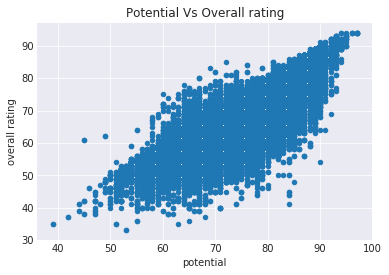

In [96]:
df_player_attributes.plot(x = 'potential', y = 'overall_rating', kind = 'scatter')
plt.title('Potential Vs Overall rating')
plt.xlabel('potential')
plt.ylabel('overall rating');

there is a positive correlation between potential and overall rating

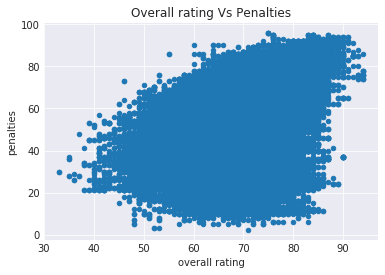

In [98]:
df_player_attributes.plot(x = 'overall_rating', y = 'penalties', kind = 'scatter')
plt.title('Overall rating Vs Penalties')
plt.xlabel('overall rating')
plt.ylabel('penalties');

there is a positive correlation between overall rating and the ability to score penalties

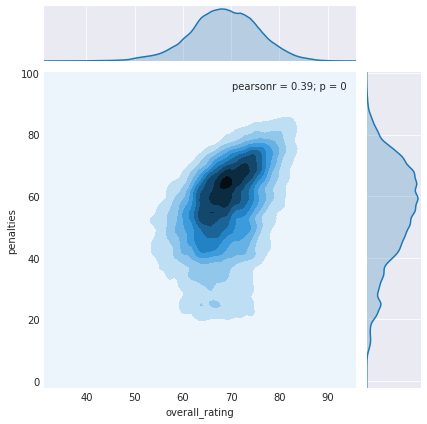

In [49]:
#representing the relationship between overall rating and pentalies using kernel density estimation
sns.jointplot(x='overall_rating', y="penalties", data=df_player_attributes, kind="kde");
#as the previous visualization, it also shows a positive correlation between a player's overall rating and his ability to successfully take penalties.

In [50]:
df_player_attributes.describe()

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,...,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000
mean,181.868586,168.776997,68.638438,73.490934,55.157009,49.979360,57.237775,62.494843,49.515609,59.294407,...,57.874658,54.937718,46.720184,50.315102,47.993419,14.705889,15.952724,20.534968,16.022223,16.329671
std,6.403832,15.105610,7.030421,6.581946,17.259233,19.051233,16.483746,14.184672,18.262078,17.759662,...,15.169217,15.565891,21.233710,21.509301,21.600515,16.846423,15.839335,21.145439,16.072445,17.186983
min,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


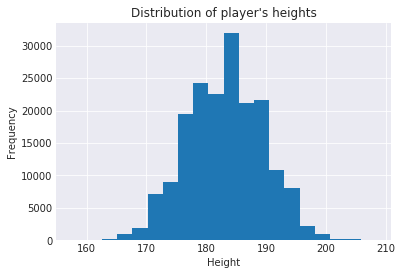

In [103]:
df_player_attributes['height'].hist(bins = 20)
plt.title("Distribution of player's heights")
plt.xlabel('Height')
plt.ylabel('Frequency');

the height data is normally distributed and it looks like most players fall into a height range of (177 - 185)

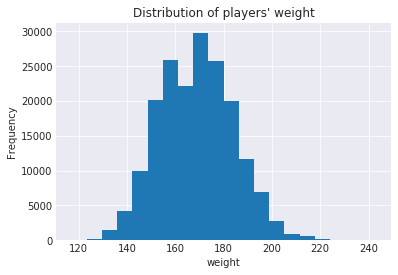

In [109]:
#the distribution of players' weight
df_player_attributes['weight'].hist(bins = 20)
plt.title("Distribution of players' weight")
plt.xlabel('weight')
plt.ylabel('Frequency');

it looks like most players fall into a weight range of (159 - 179)

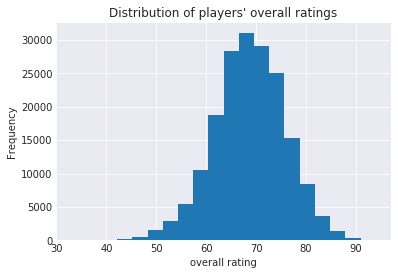

In [105]:
#the distribution of players' overall rating
df_player_attributes['overall_rating'].hist(bins = 20)
plt.title("Distribution of players' overall ratings")
plt.xlabel('overall rating')
plt.ylabel('Frequency');

the distribution is normally distributed and it seems that most players have an overall rating between 64-73.

In [54]:
#the top players in Europe over the time period in question
df_player_attributes.sort_values('overall_rating', ascending = False, inplace = True)

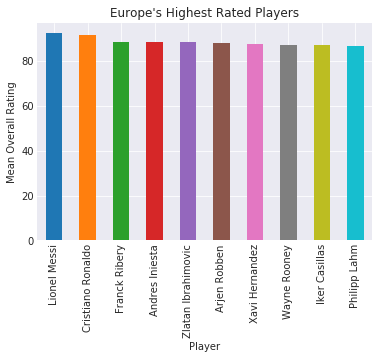

In [55]:
top_players = df_player_attributes.groupby('player_name')['overall_rating'].mean().sort_values(ascending = False)
top_players.head(10).plot(kind = 'bar')
plt.title("Europe's Highest Rated Players")
plt.xlabel('Player')
plt.ylabel('Mean Overall Rating');

Lionel Messi is the highest rated player in Europe throughout the time range of question.

### Research Question 5  (Who are the most prolific penalty takers in Europe?)

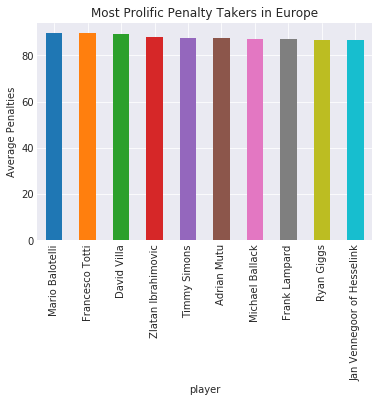

In [56]:
df_player_attributes.groupby('player_name')['penalties'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Most Prolific Penalty Takers in Europe')
plt.xlabel('player')
plt.ylabel('Average Penalties');

Mario Baloteli is the most prolific penalty taker in Europe throughout the time period in question.

### Research Question 6  (What are the attributes associated with different levels of footballers?)

In [57]:
#creating a new column for "Professional_level"
df_player_attributes.describe()

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,...,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000,182652.000000
mean,181.868586,168.776997,68.638438,73.490934,55.157009,49.979360,57.237775,62.494843,49.515609,59.294407,...,57.874658,54.937718,46.720184,50.315102,47.993419,14.705889,15.952724,20.534968,16.022223,16.329671
std,6.403832,15.105610,7.030421,6.581946,17.259233,19.051233,16.483746,14.184672,18.262078,17.759662,...,15.169217,15.565891,21.233710,21.509301,21.600515,16.846423,15.839335,21.145439,16.072445,17.186983
min,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [58]:
bins = [33.000000, 64.000000, 69.000000, 73.000000, 94.000000]
bin_names = ['rockie', 'intermediate_level', 'top level', 'world class']
df_player_attributes['professional_level'] = pd.cut(df_player_attributes.overall_rating, bins, labels= bin_names)

In [59]:
df_player_attributes.head(1)

,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,professional_level
102495,Lionel Messi,1987-06-24,170.18,159,2013-03-08,94.0,97.0,left,high,medium,...,78.0,13.0,21.0,20.0,6.0,11.0,15.0,14.0,8.0,world class


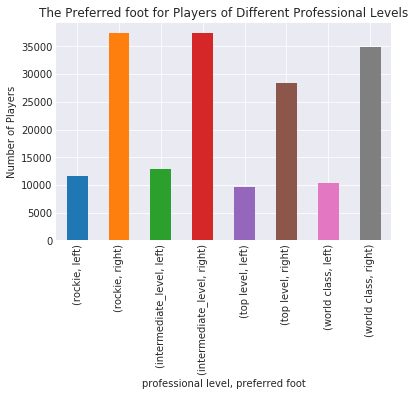

In [60]:
#the preferred foot for players of different professional levels
df_player_attributes.groupby(['professional_level', 'preferred_foot'])['player_name'].count().plot(kind = 'bar')
plt.title('The Preferred foot for Players of Different Professional Levels')
plt.xlabel('professional level, preferred foot')
plt.ylabel('Number of Players');

It looks like that most players are right footed 

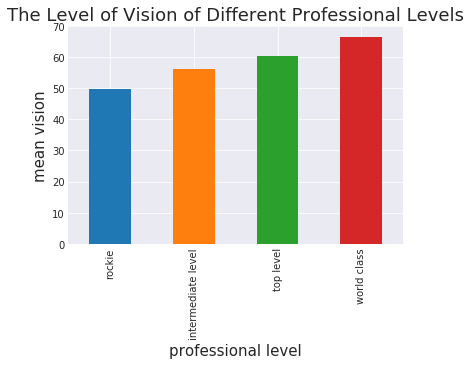

In [61]:
#the level of vision of different levels of players
df_player_attributes.groupby('professional_level')['vision'].mean().plot(kind = 'bar')
plt.title('The Level of Vision of Different Professional Levels', fontsize = 18)
plt.xlabel('professional level', fontsize = 15)
plt.ylabel('mean vision', fontsize = 15)
plt.xticks([0,1,2,3], ['rockie', 'intermediate level', 'top level', 'world class']);

it seems that players with a higher overall rating has a better vision.

<a id='conclusions'></a>
## Conclusions
> **limitations**

> 1. the soccer database from which all these datasets were extracted was complicated, and this may have slightly affected the integrity of the data selected from it.

> 2. In the team attributes dataset, I have only used the data associted with the most recent year, 2015, and ignored the rest of the data to make the analysis somewhat easier.

> **conclusions**

> 1. Home field advantage does matter as home teams have approximately 45% chance of winning while away teams ony have 28%.
> 2. Different team attributes are associated with higher winning rates.
for example, teams who used a FAST builup play speed have achieved more wins than teams who used a BALANCED and SLOW buildup play speed. Also, teams who used th offside trap as their defending strategy have experienced more loses than teams who used the COVER defender line class.
> 3. The teams who achieved the highest winning rates are FC Barcelona, Real Madrid CF, Sl Benfica, FC Porto.
> 4. over the time period in question, Lionel Messi is the highest rated player in Europe, and Mario Baloteli has been the most successful penalty taker.
> 5. Right footed players are much more common than left footed players.
> 6. the level of vision of a player is directly proportional to its overall rating, as world class players tend to much much better vision than other players.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [107]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0